<a href="https://colab.research.google.com/github/AnIsAsPe/Fundamentos-tecnicos-y-aplicaciones-ML/blob/main/Programaci%C3%B3n_l%C3%ADneal_Simplex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar bibliotecas





In [3]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Problema 1 

Una línea áerea ofrece vuelos de CDMX a Panamá. La tarifa premium es de 10,000 pesos, y permite llevar hasta 45 Kg de equipaje, mientras que tarifa ordinaria de 6,000, con un peso de equipage de máximo 15 kg.

Si el avión cuenta con 90 asientos y el máximo peso en equipaje debe ser de 3,000 Kg ¿Cuántos boletos por tipo de tarifa maximisan el beneficio, considerando que por políticas de la empresa deben ofrecerse como mínimo 10 asientos de clase ordinaria?

Variables:
* $x =$  boletos tarifa premium
* $y =$  boletos tarifa ordinaria

**Maximizar: $~~~~ f(x, y) = 10000x + 6000y$**


**Restricciones:**
* $45x + 15y <= 300$ (Restruccupion de equipaje)

* $x + y <= 90$     (Asientos disponibles)

* $y >= 10$ (política asientos clase ordinaria)

* $x ,~~ y >= 0$  ($x$ y $y$ deben de ser valores no negativos)



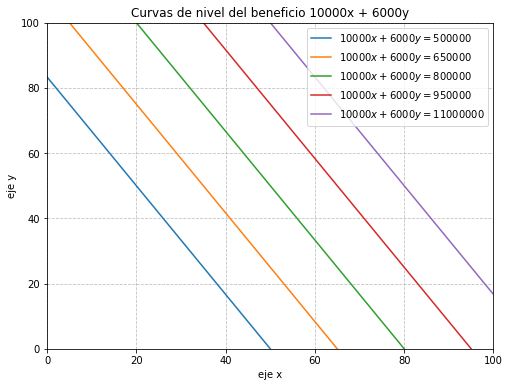

In [75]:
x = np.array([-1, 250])

b1 = ((500000-10000*x)/6000)
b2 = ((650000-10000*x)/6000)
b3 = (800000-10000*x)/6000
b4 = ((950000-10000*x)/6000)
b5 = ((1100000-10000*x)/6000)

fig = plt.figure(figsize = (8, 6))

plt.plot(x, b1, label = r'$10000x + 6000y = 500000$')
plt.plot(x, b2, label = r'$10000x + 6000y = 650000$')
plt.plot(x, b3, label = r'$10000x + 6000y = 800000$')
plt.plot(x, b4, label = r'$10000x + 6000y = 950000$')
plt.plot(x, b5, label = r'$10000x + 6000y = 11000000$')

plt.title ('Curvas de nivel del beneficio 10000x + 6000y')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.ylim(0,100)
plt.xlim(0,100)
plt.grid(alpha=.8, linestyle='--')

plt.legend()
plt.show()

In [69]:
# Vector de coeficientes de la función objetivo a ser minimizada
c = np.array([-10000, -6000]) 

#Matriz de coeficientes de las restricciones
A = np.array([[45, 15], [1, 1], [0,-1],[-1, 0], [0, -1]])

# Vector de inequidades
b = np.array([3000, 90, -10, 0, 0])


De acuerdo a  [la documentación de la función linprog()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html) observamos que la inequidad debe tener la forma $<=$

In [70]:
# Resolver el problema con programción lineal
res = linprog(c, A_ub=A, b_ub=b)

# Print results
print('Beneficio óptimo:', round(res.fun*-1, ndigits=2),
      '\nBoletos tarifa premium:', round(res.x[0]),
      '\nBoletos tarifa ordinaria:', round(res.x[1]),
      '\nIteraciones:', res.nit,
      '\nEstatus:', res.message)

Beneficio óptimo: 760000.0 
Boletos tarifa premium: 55.0 
Boletos tarifa ordinaria: 35.0 
Iteraciones: 7 
Estatus: Optimization terminated successfully.


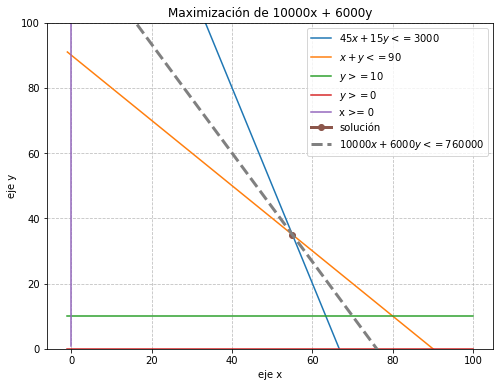

In [68]:
x = np.array([-1, 100])

y1 = (3000-(45*x))/15
y2 = 90 - x
y3 = 10+0*x
y4 = 0*x
y = (760000-10000*x)/6000

fig = plt.figure(figsize = (8, 6))

plt.plot(x, y1, label = r'$45x + 15y <= 3000$')
plt.plot(x, y2, label = r'$x + y <= 90$')
plt.plot(x, y3, label = r'$y >= 10$')
plt.plot(x, y4, label = r'$y >= 0$')
plt.plot((0, 0),(1,100), label = 'x >= 0')

plt.plot(55, 35, marker='o', lw=3, label = 'solución')
plt.plot(x, y,  ls = '--', lw=3, color='grey', label = r'$10000x + 6000y <= 760000$')


plt.title ('Maximización de 10000x + 6000y')
plt.xlabel('eje x')
plt.ylabel('eje y')
plt.ylim(0,100)
plt.xlim(0,100)
plt.grid(alpha=.8, linestyle='--')

plt.legend()
plt.show()

# Ejercicio:

*Una empresa está estudiando llevar a cabo una campaña publicitaria, para ello dispone de 20 millones de pesos. Puede difundir sus anuncios en dos canales publicitarios distintos, el primero de
ellos cobra 300 mil pesos cada vez que emite un anuncio, mientras que el segundo cobra el doble. La probabilidad de que un anuncio del primer canal sea visto es del 30 %, mientras que del segundo es del 70 %. Como mínimo deben emitirse 26 anuncios en el primer canal y 13 en el segundo.*

Determine el número de anuncios que debe lanzar en cada canal de manera que maximice la probabilidad de que se vea el anuncio de la empresa, teniendo en cuenta la restricción presupuestaria y las del número de anuncios. 









